In [1]:
##########################################################
# DSC5103 Statistics
# Session 3. Demo of linear regression using the "tips" dataset
# 2016.11
#
##########################################################

In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [3]:
######################################################
# 0. load and explore the tips data
######################################################
tips = pd.read_csv('tips.csv')

In [4]:
tips.keys()

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
tips.shape

(244, 7)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# EDA and Summary Statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


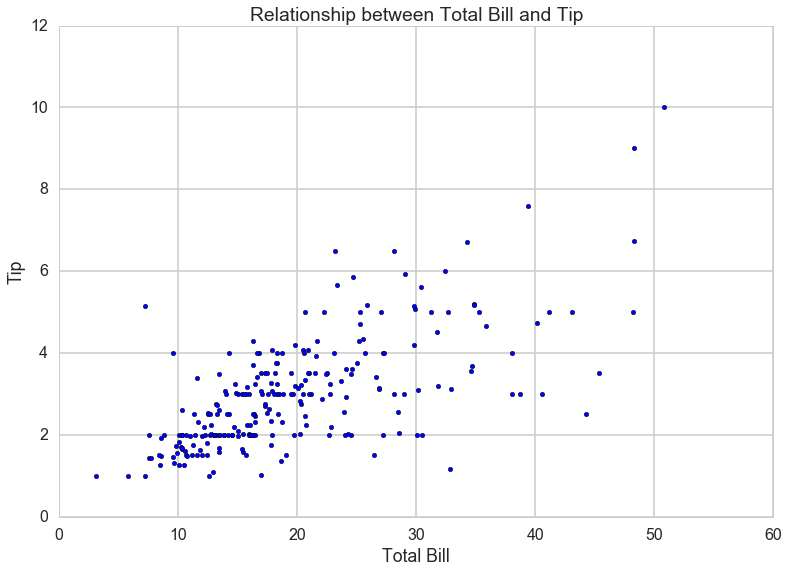

In [8]:
# Scatter plots
plt.scatter(tips.total_bill, tips.tip)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relationship between Total Bill and Tip")

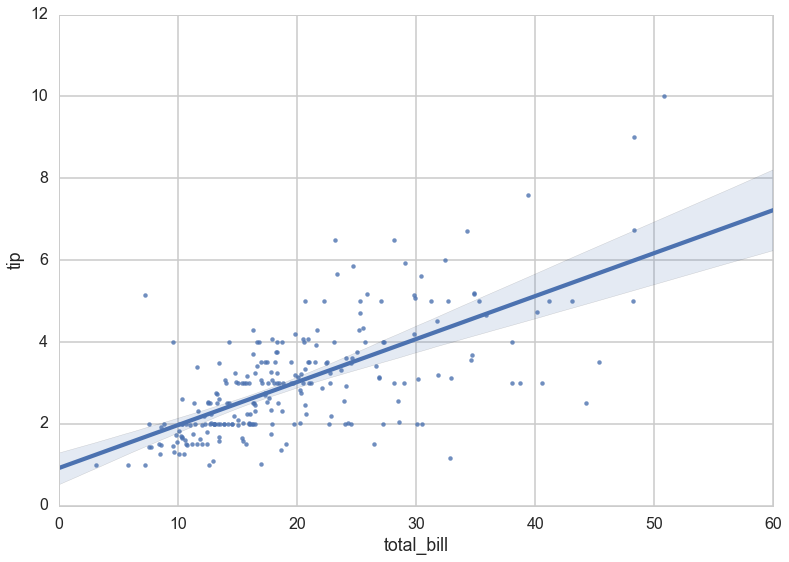

In [9]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)
sns.regplot(y="tip", x="total_bill", data=tips, fit_reg = True)

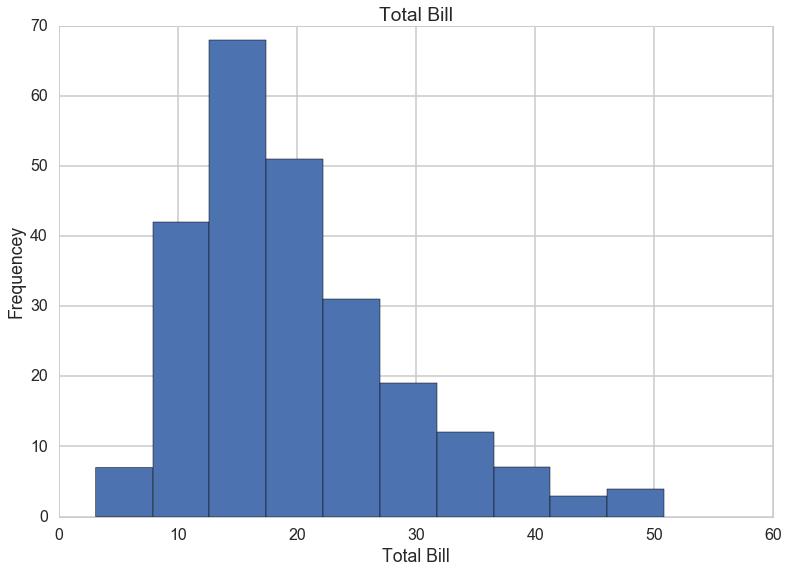

In [10]:
# Histograms
plt.hist(tips.total_bill)
plt.title("Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequencey")
plt.show()

In [11]:
######################################################
# 1. simple linear regression: tip ~ total_bill
######################################################

In [12]:
# Fitting Linear Regression using statsmodels
# http://statsmodels.sourceforge.net/0.6.0/examples/notebooks/generated/predict.html
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
# statsmodels works nicely with pandas dataframes
lm1 = ols('tip ~ total_bill', tips).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           6.69e-34
Time:                        01:41:22   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [14]:
# Fitting Linear Regression using sklearn
from sklearn.linear_model import LinearRegression

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Use total_bill to fit linear regression model
X = tips[['total_bill']]
lm.fit(X, tips.tip)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 0.920269613555


In [17]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 1


In [18]:
# The coefficients
# zip returns an iterator in python 3
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,total_bill,0.105025


In [19]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 2.70463616,  2.00622312,  3.12683472,  3.40725019,  3.5028225 ])

In [20]:
# calculate the residual sum of square
np.sum((tips.tip - lm.predict(X)) ** 2)

252.78874385077597

In [21]:
# calculate the mean squared error
mse1 = np.mean((tips.tip - lm.predict(X)) ** 2)
mse1

1.0360194420113769

In [22]:
######################################################
# 2. multiple linear regression
######################################################

In [23]:
## multiple regression
lm2 = ols('tip ~ total_bill + size', tips).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           9.67e-34
Time:                        01:41:45   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.0

In [24]:
## multiple regression with dummy variables
lm3 = ols('tip ~ total_bill + size + sex', tips).fit()
print(lm3.summary())
# sex[T.Male] is not significant, we have a slightly higher R^2 but lower adjusted R^2 compared to model 2

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     70.36
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           1.11e-32
Time:                        01:41:48   Log-Likelihood:                -347.97
No. Observations:                 244   AIC:                             703.9
Df Residuals:                     240   BIC:                             717.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.6819      0.205      3.322      

In [25]:
# two separated regressions
lm3m = ols('tip ~ total_bill + size', tips.query('sex == "Male"')).fit()
print(lm3m.summary())
lm3f = ols('tip ~ total_bill + size', tips.query('sex == "Female"')).fit()
print(lm3f.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     64.73
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           3.96e-21
Time:                        01:41:53   Log-Likelihood:                -236.89
No. Observations:                 157   AIC:                             479.8
Df Residuals:                     154   BIC:                             488.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6110      0.269      2.272      0.0

In [26]:
## multiple regression with more dummy variables
lm4 = ols('tip ~ total_bill + size + day', tips).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.07
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           6.05e-31
Time:                        01:41:56   Log-Likelihood:                -347.69
No. Observations:                 244   AIC:                             707.4
Df Residuals:                     238   BIC:                             728.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.7458      0.281      2.651      

In [27]:
# to use Thur as the baseline
lm4b = ols('tip ~ total_bill + size + C(day, Treatment(reference="Thur"))', tips).fit()
print(lm4b.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     42.07
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           6.05e-31
Time:                        01:41:58   Log-Likelihood:                -347.69
No. Observations:                 244   AIC:                             707.4
Df Residuals:                     238   BIC:                             728.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------

In [28]:
## multiple regression with interactions
# without interaction
lm5a = ols('tip ~ total_bill + size + smoker', tips).fit()
print(lm5a.summary())
# with interaction
lm5b = ols('tip ~ total_bill * smoker + size', tips).fit()
print(lm5b.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     70.57
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           9.41e-33
Time:                        01:42:01   Log-Likelihood:                -347.80
No. Observations:                 244   AIC:                             703.6
Df Residuals:                     240   BIC:                             717.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.7090      0.205      3.461

In [29]:
## multiple regression with polynomial terms
# quadratic
lm6a = ols('tip ~ total_bill + np.power(total_bill, 2) + size', tips).fit()
print(lm6a.summary())

# polynomial
lm6b = ols('tip ~ total_bill + np.power(total_bill, 2) + np.power(total_bill, 3) + np.power(total_bill, 4)', tips).fit()
print(lm6b.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     70.35
Date:                Thu, 24 Nov 2016   Prob (F-statistic):           1.12e-32
Time:                        01:42:03   Log-Likelihood:                -347.97
No. Observations:                 244   AIC:                             703.9
Df Residuals:                     240   BIC:                             717.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

In [31]:
# visualize polynomial fit
tips_new = pd.DataFrame(np.arange(1, 60.1, 0.5), columns=['total_bill'])
pred6b = lm6b.predict(exog=dict(total_bill=tips_new.total_bill))
tips_new['pred6b'] = pred6b

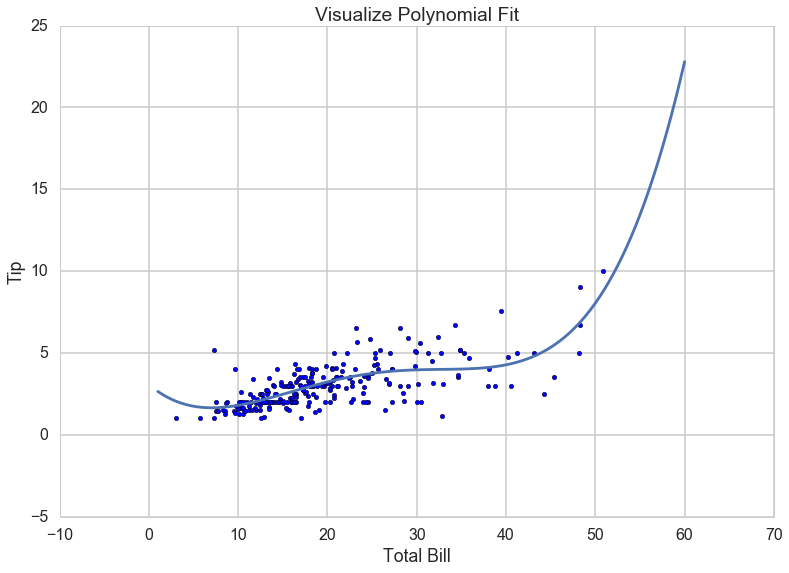

In [32]:
plt.scatter(tips.total_bill, tips.tip)
plt.plot(tips_new.total_bill, tips_new.pred6b)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Visualize Polynomial Fit")

In [33]:
# http://stackoverflow.com/questions/22428625/does-statsmodels-or-another-python-package-offer-an-equivalent-to-rs-step-f
import itertools
predictorcols = tips.drop('tip', axis = 1)
AICs = {}
AICs = {}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols, k):
        predictors = list(variables)
        i = True
        independent =''
        for p in predictors:
            if i:
                independent = p
                i=False
            else:
                independent+='+ {}'.format(p)
        regresion = 'tip ~ {}'.format(independent)
        res = ols(regresion, data=tips).fit()
        AICs[variables] = 2*(k+1) - 2*res.llf
min(AICs, key=AICs.get)

('total_bill', 'size')